 # 【ラビットチャレンジ】深層学習前編（day1,day2）

## 0. ニューラルネットワーク全体像

<img src='NN_1.jpg'>

機械学習のモデル
* 識別モデル
* 生成モデル



|  モデル  |  識別  | 生成 |
| ------- | ---- | ---- |
|  目的  |  データを目的のクラスに分類する  | 特定のクラスのデータを生成する |
|  例 | 動物の画像から種別を分類 | 犬らしい画像の生成 |
|  計算結果  |  $p(c_k|x)$   | $ p(x|C_k) $|
| 具体的なモデル | SVM、NN | VAE, GAN |


万能近似定理

ニューラルネットワークのようなネットワークによりどんな関数でも近似できる。




### 確認テスト
<img src='DNN_1.jpg'>

##  1.入力～中間層


<img src='INPUT_1.jpg'>

入力層では、ニューラルネットワークに何等かの数値を入力する層


ここでは、n個の入力ノードから $ (x_1, x_2, \dots x_n) $　を受けとる。
入力層から入った入力には、入力ノード毎の重み $ w_i $が乗算され、バイアス $ b_i $を加え、
中間層に伝達する。

すなわち、
$$
z = \sum ( w_i x_i + b_i )
$$
が中間層の入力となる。


ニューラルネットワークの学習では、$\mathbf{W}$, $b$を調整してゆくことになる。


### 確認テスト

<img src='INPUT_2.jpg'>

### 確認テスト
<code>
    u1=np.dot(x,W1)+b1
</code>

#### 実装実習

3層のネットワークの処理部分

<code>
    # 1層の総入力
    u1 = np.dot(x, W1) + b1
    # 1層の総出力
    z1 = functions.relu(u1)
    # 2層の総入力
    u2 = np.dot(z1, W2) + b2
    # 2層の総出力
    z2 = functions.relu(u2)
    # 出力層の総入力
    u3 = np.dot(z2, W3) + b3
    # 出力層の総出力
    y = u3
</code>



## 2.活性化関数

次の層への出力の大きさを決める。
* シグモイド、tanh 等 : そのノードの寄与する割合を決定する
* 恒等関数等 : 値の強弱を決める。

活性化関数 は 非線形関数であることが重要

線形性とは

加法性
$$
f(x+y) = f(x) + f(y)
$$

斉次性
$$
f(k x) = k f(x)
$$
を満たすこと。

非線形の関数を用いることで、多彩な表現を記述することが可能となる。

線形関数は、多数のニューロンを組み合わせなくても、表現可能
となってしまうため、意味がない。

#### 確認テスト

<img src="LINEAR_1.jpg">

### 中間層

中間層と出力層で使われる活性化関数が異なる。

中間層で使われる主な活性化関数は以下の通り

* ステップ関数　もはや使われない
* シグモイド
* ReLU関数　勾配消失解消

#### 確認テスト

<code>
   z = functions.relu(u)   
</code>




#### 実装演習

代表的な活性化関数

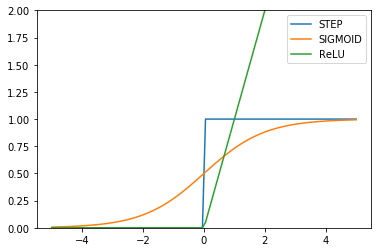

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
def step_function(x):
    return np.where(x>0, 1.0, 0.0)
    
def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(0,x)

x=np.linspace(-5,5,100)

plt.ylim([0,2])
plt.plot(x,step_function(x),label='STEP')
plt.plot(x,sigmoid(x),label='SIGMOID')
plt.plot(x,relu(x),label='ReLU')
plt.legend()

#### 確認テスト

<code>
   z = functions.relu(u)   
</code>



## 3.出力層

人間が欲しいデータを最終的に出してほしいものを出力

分類問題の場合、各クラスに属する確率


### 活性化関数
* ソフトマックス関数
* 恒等写像
* シグモイド関数

出力層で得られた結果を教師データと比較し、教師データに近づけるように重みを調整する。

#### ソフトマックス関数
$$
y_i = { e^x_i \over \sum_j e^x_j }
$$
* 多値分類。
* 0 ～　1の値の配列。合計で1 となる。
* それぞれのクラスに属する確率（ワンホットベクトル表現)

例えば
犬、猫、ネズミを判別するニューラルネットの出力が
$$
y = [0.9, 0.08, 0.02]
$$
であった場合、犬である確率 90%, 猫である確率 8%、ネズミである確率 2% 
という具合に読み替えられる。

#### 恒等写像
$$
y_i = x_i
$$

#### シグモイド

$$
y = \sigma (x)
$$
* 2値分類。
* 0 ～　1の値をとる。
* 真である確率

### 誤差関数

教師データとネットワークの出力データを比較し、その違いの大きさを測る。

#### 二乗誤差

$$
E_n = \frac{1}{2} \sum_i (y_i - d_i)^2
$$
教師データ$d_i$とどれだか離れているか？

#### 交差エントロピー

$$
E_n = - \sum_i d_i \log y_i
$$
教師データの分布$d_i$とどれだけ似ているか？

#### 比較

|   問題の種類 |  回帰  |二値分類  |多値分類  |
| ---- | ---- |---- |---- |
| 活性化関数  |  恒等写像  |シグモイド|ソフトマックス|
|  誤差関数  |  二乗誤差  |交差エントロピー|交差エントロピー|


#### 確認テスト

誤差伝搬では、誤差を微分した値が前方の層に伝えられる。

$ E_n(w) $ の微分は

$$
{\partial E \over \partial y} = (y-d)
$$
となり、1/2を乗ずる必要がなくなり、記述が簡単になる。
それ以上の本質的な意味はない。

### 実装演習1_1_forward_propagation


In [1]:
import sys
sys.path.append('C:\\Users\\emo\\Google Drive\\DNN_code_colab_lesson_1_2')
import numpy as np
from common import functions
import matplotlib.pyplot as plt

def print_vec(text, vec):
    print("*** " + text + " ***")
    print(vec)
    #print("shape: " + str(x.shape))
    print("")

# ウェイトとバイアスを設定
# ネートワークを作成
def init_network():
    print("##### ネットワークの初期化 #####")

    network = {}
    network['W1'] = np.array([
        [0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]
    ])

    network['W2'] = np.array([
        [0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]
    ])

    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['b2'] = np.array([0.1, 0.2])
    
    print_vec("重み1", network['W1'])
    print_vec("重み2", network['W2'])
    print_vec("バイアス1", network['b1'])
    print_vec("バイアス2", network['b2'])

    return network

# 順伝播
def forward(network, x):
    print("##### 順伝播開始 #####")

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    u2 = np.dot(z1, W2) + b2
    y = functions.softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))

    return y, z1

# 誤差逆伝播
def backward(x, d, z1, y):
    print("\n##### 誤差逆伝播開始 #####")

    grad = {}

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    #  出力層でのデルタ
    delta2 = functions.d_sigmoid_with_loss(d, y)
    #  b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    #  W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    #  中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    #  W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
        
    print_vec("偏微分_dE/du2", delta2)
    print_vec("偏微分_dE/du2", delta1)

    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad
    
# 訓練データ
x = np.array([[1.0, 5.0]])
# 目標出力
d = np.array([[0, 1]])
#  学習率
learning_rate = 0.01
network =  init_network()
y, z1 = forward(network, x)

# 誤差
loss = functions.cross_entropy_error(d, y)

grad = backward(x, d, z1, y)
for key in ('W1', 'W2', 'b1', 'b2'):
    network[key]  -= learning_rate * grad[key]

print("##### 結果表示 #####")    


print("##### 更新後パラメータ #####") 
print_vec("重み1", network['W1'])
print_vec("重み2", network['W2'])
print_vec("バイアス1", network['b1'])
print_vec("バイアス2", network['b2'])


ModuleNotFoundError: No module named 'common'

## 4.勾配降下法

### 深層学習の目的

学習を行い誤差を最小にする。（誤差 $E(w)$を最小にする$w$を見つける

$$
{\mathbf w}^{(t+1)}={\mathbf w}^(t) - \epsilon \nabla E 
$$

$$
\nabla E = {\partial E \over \partial {\mathbf w}} =  [ {\partial E \over \partial w_1}, \dots  {\partial E \over \partial w_M}]
$$



のように、誤差 ${\mathbf w}$を逐次更新する。

<img src="GRADIENT_2.jpg">

$ E(x) $ の接線方向に x を更新することで、極小値に近づく。

$ \epsilon $ が更新する割合を決めるマジックナンバー

####該当するコード
<code>
    network[key] -= learning_rate * grad[key]
</code>

### 確率的勾配法(SDG)

$ E $の勾配を求める際に全学習データを用いて計算するするのは非常に時間がかかることから、ランダムで学習データを選び、勾配の計算を行う。

* 計算コストの軽減
* 望まない局所極小値に収束するリスクの軽減
* オンライン学習ができる（モデルに都度学習を行わせる）⇔バッチ学習

実際のコード
<pre>
for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]
</pre>

#### 確認テスト
オンライン学習とはデータが入ってくるたびに都度パラメータを更新し、学習させる方法。

対して、バッチではすべての学習データを使ってパラメタ更新を行う

#### ミニバッチ勾配降下法

メモリに乗りきらない巨大なデータを分割して行う。

ランダムに分割したデータの集合（ミニバッチ）$D_t$に属するサンプルの平均誤差

データを分割して行うことで並列化による高速化が期待できる。

#### 確認テスト

$$
w^{(t+1)}=w^{(t)}-\epsilon \nabla E_t
$$

<img src='BATCH.jpg'>


#### 実装演習

確率勾配降下法

<code>
    # データのランダム抽出
    random_datasets = np.random.choice(data_sets, epoch)
    # 勾配降下の繰り返し
    for dataset in random_datasets:
    x, d = dataset['x'], dataset['d']
    z1, y = forward(network, x)
    grad = backward(x, d, z1, y)
    # パラメータに勾配適用
    for key in ('W1', 'W2', 'b1', 'b2'):
        network[key]  -= learning_rate * grad[key]
    # 誤差
    loss = functions.mean_squared_error(d, y)
    losses.append(loss)
</code>

学習セットのデータすべてを用いずに、
<code>
        random_datasets = np.random.choice(data_sets, epoch)
</code>
でデータの一部を取り出し、学習を行っている。


## 5.誤差伝搬法

勾配法を用いる際、$ {\partial E \over \partial W} $が必要となる。

ところが、数値微分

$$
{\partial E \over \partial w_n} \sim { E(w_n + h) - E(w_n - h) \over 2h }
$$

は一般的な方法であるが、計算量が非常に大きくなる。

このため、ニューラルネットワークでは一般的に誤差逆伝搬法を用いる


算出された誤差を出力層から順に微分し、前の層に伝える。

<img src="BACKWARD_1.jpg">

後ろ層の計算結果から、微分を逆算することで、不要な再帰的な計算を避けることができる。






<img src='BACKWARD_3.jpg'>



アフィン変換 $y=x W + b$ の逆伝搬
$$
{\partial E \over \partial W} = X^T {\partial E \over \partial y} \\
{\partial E \over \partial X} = {\partial E \over \partial y} W^T \\
{\partial E \over \partial b} = {\partial E \over \partial y} I
$$
形をイメージすると覚えやすい
<img src='BACKWARD_6.jpg'>

ソフトマトリックス出力のクロスエントロピー

$$
{\partial E \over \partial x}=-\frac{1}{N}(y - t)
$$

#### 実装演習

In [2]:

# 順伝播
def forward(network, x):
    print("##### 順伝播開始 #####")

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    
    u1 = np.dot(x, W1) + b1
    z1 = functions.relu(u1)
    u2 = np.dot(z1, W2) + b2
    y = functions.softmax(u2)
    
    print_vec("総入力1", u1)
    print_vec("中間層出力1", z1)
    print_vec("総入力2", u2)
    print_vec("出力1", y)
    print("出力合計: " + str(np.sum(y)))

    return y, z1

# 誤差逆伝播
def backward(x, d, z1, y):
    print("\n##### 誤差逆伝播開始 #####")

    grad = {}

    W1, W2 = network['W1'], network['W2']
    b1, b2 = network['b1'], network['b2']
    #  出力層でのデルタ
    delta2 = functions.d_sigmoid_with_loss(d, y)
    #  b2の勾配
    grad['b2'] = np.sum(delta2, axis=0)
    #  W2の勾配
    grad['W2'] = np.dot(z1.T, delta2)
    #  中間層でのデルタ
    delta1 = np.dot(delta2, W2.T) * functions.d_relu(z1)
    # b1の勾配
    grad['b1'] = np.sum(delta1, axis=0)
    #  W1の勾配
    grad['W1'] = np.dot(x.T, delta1)
        
    print_vec("偏微分_dE/du2", delta2)
    print_vec("偏微分_dE/du2", delta1)

    print_vec("偏微分_重み1", grad["W1"])
    print_vec("偏微分_重み2", grad["W2"])
    print_vec("偏微分_バイアス1", grad["b1"])
    print_vec("偏微分_バイアス2", grad["b2"])

    return grad


上記プログラムの backward 関数の解読


softmax からの逆伝搬は functions.d_sigmoid_with_loss(d, y) 
を用いて、$ d_2 $に代入

$$
u_2 = z_1 \mathbf{W_2} + b_2 
$$

であるから、
$$
{\partial E \over \partial b_2} = [1, 1, \dots, 1] d_2 \\
{\partial E \over \mathbf{W_2}} = z_1^T d_2
$$
同様にして、
$$
{\partial E \over \partial b_1} = [1, 1, \dots, 1] d_1 \\
{\partial E \over \mathbf{W_1}} = x^T d_1
$$

#### 確認テスト

$$
{\partial E \over \partial y}{\partial y \over \partial u}
$$
に相当する部分
<code>
    delta2 = functions.d_mean_squared_error(d, y)
 </code>
 
 
$$
{\partial E \over \partial y}{\partial y \over \partial u}{\partial u \over \partial w^{(2)}_p}
$$
に相当する部分
<code>
    grad['W2'] = np.dot(z1.T, delta2)
 </code>

#### 実装演習 (1_3_stochastic_gradient_descent)

シグモイド関数の場合

<img src='BACKWARD_4.jpg'>

ReLU 関数の場合
<img src='BACKWARD_5.jpg'>

## 6.勾配消失問題

多層構造のネットワークを逆伝搬層で、更新していったとき、勾配が次第に小さくなり、学習が進まなくなる。
<img src='VANISHING_3.jpg'>
解決法
* 活性化関数の選択
* 重みの初期化
* バッチ正規化

### 活性化関数の選択

活性化関数 $y=f(u)$とすると、
逆伝搬では

$$
{\partial E \over \partial y}{\partial y \over \partial u}
$$

のように、活性化関数の微分が掛け合わされ、
前層に伝えられる。

多くの活性化関数の微分は 0 から 1 の間の値をとり、掛け合わせる毎に小さくなって行く。


代表的な例ではシグモイド関数
$$
y={1 \over 1 + exp(-x)}
$$
が上げられる。

$$
y=f(u)=\sigma(u)
$$
とすると、

$$
\sigma(u)'=(1-\sigma(x))\sigma(x)
$$

であり、以下のように 0～ 0.25 の値をとる。
このため、シグモイドの層を通ると誤差が次第に小さくなり、前方の層に伝わらないということが生ずる。


#### 確認テスト

シグモイド関数の微分の最大値は 0.25

シグモイド関数の微分

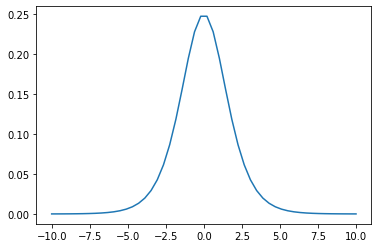

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10)

dy = (1 - sigmoid(x)) * sigmoid(x)
plt.plot(x, dy)

plt.show()

#### ReLU

* 勾配消失問題の解消　微分が1なので勾配消失が起こらない
* スパース化　必要なところしか伝わらないという利点もある。



### 初期化方法の改良

機械学習を行う場合、重み w の初期値は、適度に散らばっていたほうが望ましい。
正規分布で初期化すると、0または1に偏った分布となる。
この場合、シグモイド関数等の活性化関数を使った場合、
0となってしまい、勾配の消失が発生する。

この問題を解決するために、以下のような初期化方法が考案された。

* Xavier法

前層のノード数が n の場合 $ 1/\sqrt{n} $を標準偏差とした分布を使う

* He法

$ \sqrt{2.0 \over n} $を標準偏差とした分布を使う

### バッチ正規化
ミニバッチ内の値の平均を 0、分散を1になるように正規化する。


### 実装演習

初期化：ガウス分布、活性化関数：シグモイド
<img src="VANISHING_1.png">

初期化：ガウス分布、活性化関数：ReLU
<img src="VANISHING_2.png">

初期化：Xavier、活性化関数：シグモイド
<img src="VANISHING_3.png">

初期化：He、活性化関数：ReLU
<img src="VANISHING_4.png">


## 7. 学習率最適化手法

勾配降下法は以下の計算を行い、E(w)を最小化するwを見つける。
$$
\mathbf{w}_{(t+1)} = \mathbf{w}_{t} - \epsilon \nabla E
$$

学習率の大きさによって

* 大きすぎる場合 : 最適値にいつまでも近づかず、振動または、発散
* 小さし切る場合：収束までに時間がかかる。大局的最適値に収束しづらい

### 勾配法の改良

#### Momentum

勾配に加えて現在の速度の概念を導入

$$
\mathbf{V}_t = \mu \mathbf{V}_{t-1} - \epsilon \nabla E
$$
$$
\mathbf{w}^{(t+1)} = \mathbf{W}^{(t)} + \mathbf{v_t}
$$


* 誤差をパラメータで微分したものと学習率の積を減算した後、現在の重みに前回の重みを減算した値と慣性の積を加算する
* 局所的最適解にはならず、大域的最適解となる。
* 谷間についてから最も低い位置(最適値)にいくまでの時間が早い

実際のコード
<code>
        v[key] = momentum * v[key] - learning_rate * grad[key]
        network.params[key] += v[key]
</code>

#### AdaGrad

学習を進めるにつれて学習率を減衰させる方法

$$
h_0 = \theta
$$

$$
h_t = h_{t-1} + (\nabla E)^2
$$

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \epsilon {1 \over \sqrt{h_t} + \theta} \nabla E 
$$


* 誤差をパラメータで微分したものと再定義した学習率の積を減算する（)
* 勾配の緩やかな斜面に対して、最適値に近づける
* 学習率が徐々に小さくなるので、鞍点問題を引き起こす事があった。

実際のコード
<code>
        h[key] +=  np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)
</code>

#### RMSProp

AdaGrad を改良し、h が大きくなりすぎて、繰り返し回数が大きくなると
重みが更されなくなる問題を解消する。


$$
h_t = \alpha h_{t-1} + (1-\alpha)(\nabla E)^2
$$

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \epsilon {1 \over \sqrt{h_t} + \theta} \nabla E 
$$

* 局所的最適解にはならず、大域的最適解となる。
* ハイパーパラメータの調整が必要な場合が少ない

実際のコード
<code>
        h[key] *= decay_rate
        h[key] += (1 - decay_rate) * np.square(grad[key])
        network.params[key] -= learning_rate * grad[key] / (np.sqrt(h[key]) + 1e-7)
</code>


#### Adam

MomentumとRMSPropを組み合わせた手法
$$
\mathbf{g}^{(t)}=\nabla E(\mathbf{w}^{(t)})\\
$$
$$
\mathbf{m}_t=\rho_1\mathbf{m}_{t-1}+(1-\rho_1)\mathbf{g}^{(t)}
$$
$$
\mathbf{v}_t=\rho_2\mathbf{v}_{t-1}+(1-\rho_2)(\mathbf{g}^{(t)})^2
$$
$$
\hat{\mathbf{m}}_t=\frac{\mathbf{m}_t}{1-\rho_1^t}
$$
$$
\hat{\mathbf{v}}_t=\frac{\mathbf{v}_t}{1-\rho_2^t}
$$
$$
\Delta\mathbf{w}^{(t)}=-\frac{\eta}{\sqrt{\hat{\mathbf{v}}_t+\varepsilon}}\hat{\mathbf{m}}_t\\
\mathbf{w}^{(t+1)}=\mathbf{w}^{(t)}+\Delta\mathbf{w}^{(t)}
$$

* モメンタムおよびRMSPropのメリットを孕んだアルゴリズムである

実際のコード
<code>
        m[key] += (1 - beta1) * (grad[key] - m[key])
        v[key] += (1 - beta2) * (grad[key] ** 2 - v[key])            
        network.params[key] -= learning_rate_t * m[key] / (np.sqrt(v[key]) + 1e-7)                
</code>


それぞれの最適化法の比較

<img src='OPTIMIZER_1.jpg'>

## 8.過学習

訓練データに過度に適応してしまい、テストデータ等、その他のデータで精度を得られなくなる。

大きなニューラルネットワークで発生する。


<img src='OVERTRAINING_1.jpg'>

学習の進捗具合をチェックし、過学習を避ける
<img src='OVERTRAINING_2.jpg'>

過学習を避けるための方法として、

* 正規化
* ドロップアウト

がある。

### 正規化

誤差
$$
L=E(w)
$$
でLを最小化する問題では、過度にテストデータに最適化されてしまう問題が発生する。
そこで、Lにペナルティ項（正則化項）を加え、
$$
L=E(w)+\frac{1}{p} \lambda \|x\|_p
$$
を最適化するようにする。

ここでは、pノルム
$$
|x|_p=(\|x_1\|^p+\dots+|x_n|^p)^{1 \over p}
$$
を加える。


p=1の場合L1正則化 (Lasso回帰） <br/>
p=2の場合L2正則化（Ridge回帰）

と呼ぶ。


#### 参考：AIC(赤池情報量基準)

$$
AIC = -2 \log L + 2M
$$
を最小化するモデルを選ぶ。

L 最大尤度

M モデルのパラメタ数

誤差が正規分布の場合、

$$
\log L = {N \over 2} \log (2 \pi \sigma^2)  - {RSS \over 2 \sigma^2}
$$

RSS : 残差平方和

$$
\sigma^2 = {RSS \over N}
$$

より、

$$
\log L = {N \over 2} \log ({2 \pi RSS \over N})  - {N \over 2}
$$

したがって、
$$
AIC = N \log 2\pi + N \log {RSS \over N} + N + 2M
$$
これより、

$$
N \log {RSS \over N} + 2M
$$

を最小化することになる。



#### 確認テスト

L1, L2 正則化の場合、誤差項と正則化項の等高線はそれぞれ、右図、左図になる。
L1正則化では、0の所で最小値をとることから、
スパース化に貢献する。

<img src='VANISHING_5.png'>

### ドロップアウト

* ノード数が多いことによって生じる弊害を
ランダムにノードを削除することによって解決する。
* データ量を変化させずに、異なるモデルを学習させていると解釈できる

実際のコード
<code>
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)
    def backward(self, dout):
        return dout * self.mask
</code>

ドロップアウト率を決めて、ランダムにノードを返す。


#### 実装演習

過学習
<img src='OVERFITTING_1.jpg'>

L2正則化
<img src='OVERFITTING_2.jpg'>

L1正則化 weight_decay_lambda=0.005
<img src='OVERFITTING_3.jpg'>

L1正則化 weight_decay_lambda=0.05
<img src='OVERFITTING_4.jpg'>

L1正則化 weight_decay_lambda=0.0005
<img src='OVERFITTING_5.jpg'>

ドロップアウト dropout_ratio=0.15
<img src='OVERFITTING_6.jpg'>

ドロップアウト dropout_ratio=0.05
<img src='OVERFITTING_7.jpg'>

ドロップアウト dropout_ratio=0.3
<img src='OVERFITTING_8.jpg'>

ドロップアウト + L1正則化
<img src='OVERFITTING_9.jpg'>



## 9.畳み込みニューラルネットワークの概念

畳み込みニューラルネットワークは、次元的にでつながりあるデータ、音声や画像等データ等を取り扱うためによく使われている。



### 畳み込みの概念
<img src="CONVOLUTION_1.jpg">

フィルタを動かしながら、入力データと掛け合わせ、合計を求める。

$$
u(i,j,k)=\sum_m \sum_n x(i+m, j+n)h(m,n, k)
$$


* FFTやデジタルフィルタの処理に似ている。
* 近接したニューロンの情報を取り込む。→急激に画像の変化する場所等を見つけるのに役立つ

### パディング
入力データ（画像）の端の部分をどのように処理するかという方法。
この例では、拡張した部分を 0 として処理している。

<img src="PADDING_1.jpg">

### ストライド
フィルタをどれだけ動かすか

<img src="STRIDE_1.jpg">

以上の操作により入力画像の次元$(H,W)$に対し、
* フィルタサイズ $(F_h, F_w)$
* ストライドS
* パッディング P 

を適用した場合、出力画像の次元$(O_h, O_w)$ は

$$
O_h = {H + 2P - F_h \over S } + 1
$$
$$
O_h = {W + 2P - F_w \over S } + 1
$$

となる。


#### 確認テスト


サイズ6×6の入力画像を、サイズ2×2のフィルタで畳み込んだ時の出力画像のサイズを答えよ。なおストライドとパディングは1とする。

$$
(6 + 2 - 2 )/ 1 + 1 = 7
$$

答え： 7 x 7

### チャンネル

ある次元の座標における情報の数。

* モノラル音声：1チャンネル
* カラー画像：RGB 3チャンネル
* CTスキャン : 1 チャンネル

<img src='CHANNEL_1.png'>

### プーリング

矩形領域で最大値や平均値等をとり(Max Pooling, Average Pooling)、出力座標の値とする。

<img src='POOLING_1.jpg'>


### 全結合で学習した際の課題

画像の場合、縦、横、チャンネルの3次元データだが、1次元のデータとして処理される。→RGBの各チャンネル間の関連性が、学習に反映されないということ。

#### 実習演習

畳み込みの計算を行うために、im2col で計算しやすい形に変換
<code>
        for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
</code>

矩形範囲の要素を行ベクトルに展開する

実行例

	========== input_data ===========
	 [[[[87. 22. 43. 62.]
	   [66. 31. 56.  0.]
	   [55. 98. 63. 30.]
	   [18. 25. 73. 84.]]]
	
	
	 [[[40. 89. 10. 64.]
	   [48. 94. 25. 92.]
	   [27. 14. 85. 57.]
	   [57. 72. 87. 43.]]]]
	==============================
	============= col ==============
	 [[87. 22. 43. 66. 31. 56. 55. 98. 63.]
	 [22. 43. 62. 31. 56.  0. 98. 63. 30.]
	 [66. 31. 56. 55. 98. 63. 18. 25. 73.]
	 [31. 56.  0. 98. 63. 30. 25. 73. 84.]
	 [40. 89. 10. 48. 94. 25. 27. 14. 85.]
	 [89. 10. 64. 94. 25. 92. 14. 85. 57.]
	 [48. 94. 25. 27. 14. 85. 57. 72. 87.]
	 [94. 25. 92. 14. 85. 57. 72. 87. 43.]]
	==============================

実際の畳み込み処理

順伝搬
<code>
    def forward(self, x):
        # FN: filter_number, C: channel, FH: filter_height, FW: filter_width
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        # 出力値のheight, width
        out_h = 1 + int((H + 2 * self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2 * self.pad - FW) / self.stride)        
        # xを行列に変換
        col = im2col(x, FH, FW, self.stride, self.pad)
        # フィルターをxに合わせた行列に変換
        col_W = self.W.reshape(FN, -1).T
        out = np.dot(col, col_W) + self.b
        # 計算のために変えた形式を戻す
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        self.x = x
        self.col = col
        self.col_W = col_W
        return out
</code>

逆伝搬

<code>
    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0, 2, 3, 1).reshape(-1, FN)
        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)
        dcol = np.dot(dout, self.col_W.T)
        # dcolを画像データに変換
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)
        return dx
 </code>

## 10.最新のCNN

## AlexNet

ILSVRC-2012 で優勝。前年度の誤答率 26% を 16% までに改善

当時、勾配消失の問題で、ネットワークを深くしても
良い結果が得られなかった問題を、ReLUを利用し、
深いネットワークを作ることで、それまでニューラルネットでは
良い成績を上げられなかった画像認識の分野で革新を起こした。

### ILSVRC-2012
* 256 x 256 のカラー画像 1000 分類
* 1.2M 訓練データ
* 50k 検証用

### AlexNet


<img src='ALEXNET_1.jpg'>

* ReLU の利用 (ReLU 自体は 2010年に登場)
* dropout の利用
* GPUの利用

* 2列のネットを利用(当時の計算機の制限で並列計算を行う）



